<a href="https://colab.research.google.com/github/Carvas91/ML_algorithms_practice/blob/main/KNN_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import numpy as np
import pandas as pd
from sklearn import set_config
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


In [37]:
set_config(transform_output="pandas")

In [38]:
penguins = pd.read_csv("https://raw.githubusercontent.com/UofT-DSI/LCR/refs/heads/main/01_materials/notebooks/dataset/penguins.csv")

In [39]:
penguins.head(5)

,bill_length_mm,flipper_length_mm
0,39.1,181
1,39.5,186
2,40.3,195
3,36.7,193
4,39.3,190


In [40]:
min_max_values = penguins.agg(["min", "max"])
min_max_values

,bill_length_mm,flipper_length_mm
min,32.1,172
max,59.6,231


In [41]:
penguins_copy = penguins.copy()

In [42]:
scaler = StandardScaler()
standardized_penguins = scaler.fit_transform(penguins_copy)
standardized_penguins

,bill_length_mm,flipper_length_mm
0,-0.884499,-1.418347
1,-0.811126,-1.062250
2,-0.664380,-0.421277
3,-1.324737,-0.563715
4,-0.847812,-0.777373
...,...,...
337,2.178824,0.433355
338,-0.077396,0.077258
339,1.041543,-0.563715
340,1.261662,0.647013


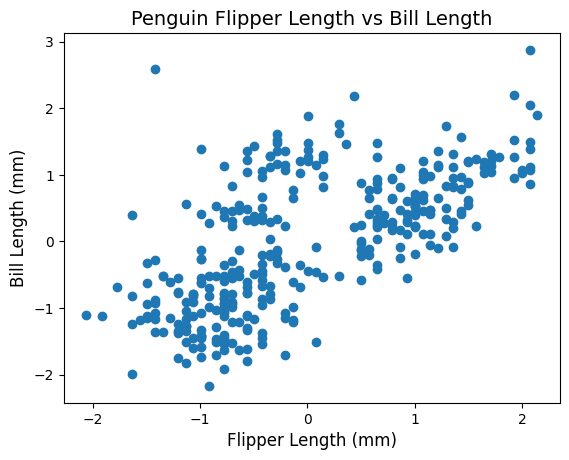

In [43]:
# Scatter plot for bill_length_mm vs flipper_length_mm
plt.scatter(standardized_penguins['flipper_length_mm'], standardized_penguins['bill_length_mm'])

# Adding labels and title
plt.title('Penguin Flipper Length vs Bill Length', fontsize=14)
plt.ylabel('Bill Length (mm)', fontsize=12)
plt.xlabel('Flipper Length (mm)', fontsize=12)

# Display the plot
plt.show()

In [44]:
kmeans = KMeans(n_clusters=3, random_state=123, n_init=10)
clusters = kmeans.fit(standardized_penguins)

In [45]:
standardized_penguins_clusters = standardized_penguins.copy()
standardized_penguins_clusters['cluster'] = clusters.labels_
standardized_penguins_clusters.head(5)

,bill_length_mm,flipper_length_mm,cluster
0,-0.884499,-1.418347,1
1,-0.811126,-1.062250,1
2,-0.664380,-0.421277,1
3,-1.324737,-0.563715,1
4,-0.847812,-0.777373,1


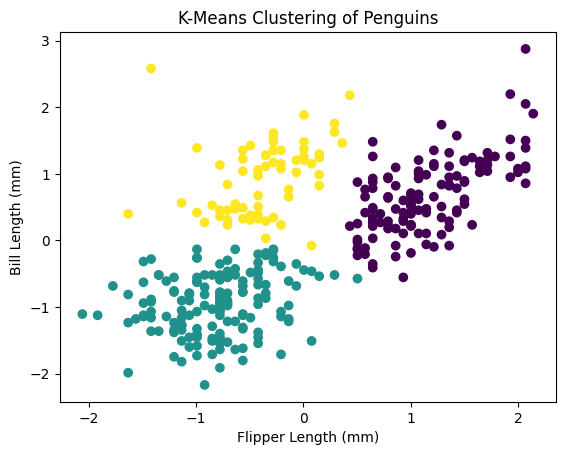

In [46]:
# Plot the clusters
plt.scatter(standardized_penguins_clusters['flipper_length_mm'], standardized_penguins_clusters['bill_length_mm'], c=standardized_penguins_clusters['cluster'])
plt.xlabel('Flipper Length (mm)')
plt.ylabel('Bill Length (mm)')
plt.title('K-Means Clustering of Penguins')
plt.show()

In [47]:
clusters.inertia_

157.8153218752379

In [48]:
penguin_clust_ks = []  # Use a list to store the results

for k in range(1, 11):
    elbow_kmeans = KMeans(n_clusters=k, random_state=123, n_init=10)
    clusters = elbow_kmeans.fit(standardized_penguins)
    penguin_clust_ks.append({'k': k, 'wssd': clusters.inertia_})  # Append as a dictionary

# Convert the list to a DataFrame
penguin_clust_ks = pd.DataFrame(penguin_clust_ks)


In [49]:
penguin_clust_ks

,k,wssd
0,1,684.000000
1,2,247.016625
2,3,157.815322
3,4,118.766244
4,5,91.476109
5,6,78.716593
6,7,66.722277
7,8,57.914115
8,9,52.458720
9,10,48.642403


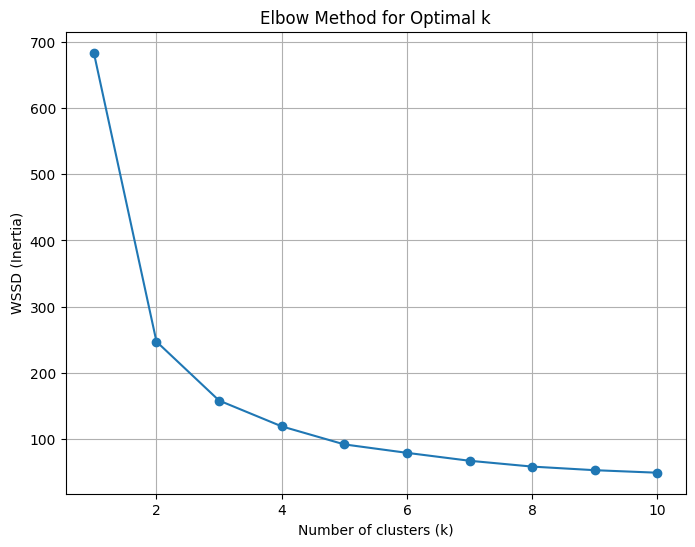

In [50]:
# Plotting the elbow graph
plt.figure(figsize=(8, 6))
plt.plot(penguin_clust_ks['k'], penguin_clust_ks['wssd'], marker='o')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of clusters (k)")
plt.ylabel("WSSD (Inertia)")
plt.grid(True)
plt.show()